# Pre-processing Data

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(200):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
#printing raw data 
for i in train_samples:
    print(i)

18
98
37
94
30
88
18
67
35
82
48
90
21
82
59
78
24
76
27
65
29
93
38
80
32
99
43
84
55
76
33
88
24
80
29
98
41
68
52
86
52
81
21
97
28
83
51
76
38
81
63
70
60
76
54
96
61
91
52
95
49
99
40
72
56
75
43
79
35
86
16
86
17
77
37
91
50
82
31
70
50
74
59
93
30
92
58
76
53
85
34
98
46
79
21
98
22
96
27
73
44
76
57
78
34
98
53
67
14
93
23
68
27
85
49
98
38
77
21
95
49
99
39
79
36
78
46
89
21
65
46
83
18
84
34
80
18
81
15
78
15
80
22
69
60
87
28
87
64
98
38
91
48
97
17
83
21
88
27
70
59
78
54
89
33
75
14
99
18
92
30
81
38
74
27
68
37
100
51
90
23
82
21
90
47
77
34
93
34
77
42
87
61
90
64
88
13
67
31
71
14
86
39
82
32
75
62
82
52
89
32
94
53
86
39
70
42
97
30
77
27
70
21
80
33
86
19
89
31
89
27
99
58
84
34
93
47
73
40
85
20
97
47
83
41
88
13
93
54
82
40
71
16
80
39
85
16
93
45
98
53
84
62
82
31
83
42
74
57
98
18
67
47
86
32
70
19
94
50
94
20
98
35
65
33
81
57
80
27
87
56
94
37
89
57
65
51
70
53
91
41
69
19
96
13
100
32
75
57
65
64
85
37
76
22
81
35
69
33
82
13
91
17
71
18
86
56
79
24
96
18
83
53

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

/home/garima/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
#printing scales data 
for i in scaled_train_samples:
    print(i)

[0.05747126]
[0.97701149]
[0.27586207]
[0.93103448]
[0.1954023]
[0.86206897]
[0.05747126]
[0.62068966]
[0.25287356]
[0.79310345]
[0.40229885]
[0.88505747]
[0.09195402]
[0.79310345]
[0.52873563]
[0.74712644]
[0.12643678]
[0.72413793]
[0.16091954]
[0.59770115]
[0.18390805]
[0.91954023]
[0.28735632]
[0.77011494]
[0.2183908]
[0.98850575]
[0.34482759]
[0.81609195]
[0.48275862]
[0.72413793]
[0.22988506]
[0.86206897]
[0.12643678]
[0.77011494]
[0.18390805]
[0.97701149]
[0.32183908]
[0.63218391]
[0.44827586]
[0.83908046]
[0.44827586]
[0.7816092]
[0.09195402]
[0.96551724]
[0.17241379]
[0.8045977]
[0.43678161]
[0.72413793]
[0.28735632]
[0.7816092]
[0.57471264]
[0.65517241]
[0.54022989]
[0.72413793]
[0.47126437]
[0.95402299]
[0.55172414]
[0.89655172]
[0.44827586]
[0.94252874]
[0.4137931]
[0.98850575]
[0.31034483]
[0.67816092]
[0.49425287]
[0.71264368]
[0.34482759]
[0.75862069]
[0.25287356]
[0.83908046]
[0.03448276]
[0.83908046]
[0.04597701]
[0.73563218]
[0.27586207]
[0.89655172]
[0.42528736]
[0.79

# Creating Model

In [8]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense 
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


In [9]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation='softmax')
])
#model layers  

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Adam is a optimizer , compile is used to train model

In [12]:
model.fit(scaled_train_samples, train_labels,validation_split = 0.1, batch_size=10, epochs = 20, shuffle=True, verbose = 2)

Train on 450 samples, validate on 50 samples
Epoch 1/20
 - 42s - loss: 0.6840 - acc: 0.5111 - val_loss: 0.6767 - val_acc: 0.5200
Epoch 2/20
 - 0s - loss: 0.6820 - acc: 0.5267 - val_loss: 0.6729 - val_acc: 0.5400
Epoch 3/20
 - 0s - loss: 0.6794 - acc: 0.5600 - val_loss: 0.6682 - val_acc: 0.5600
Epoch 4/20
 - 0s - loss: 0.6768 - acc: 0.5778 - val_loss: 0.6647 - val_acc: 0.6200
Epoch 5/20
 - 0s - loss: 0.6746 - acc: 0.5800 - val_loss: 0.6609 - val_acc: 0.6200
Epoch 6/20
 - 0s - loss: 0.6723 - acc: 0.5956 - val_loss: 0.6565 - val_acc: 0.6200
Epoch 7/20
 - 0s - loss: 0.6699 - acc: 0.5956 - val_loss: 0.6526 - val_acc: 0.6600
Epoch 8/20
 - 0s - loss: 0.6674 - acc: 0.6022 - val_loss: 0.6483 - val_acc: 0.6800
Epoch 9/20
 - 0s - loss: 0.6648 - acc: 0.6267 - val_loss: 0.6441 - val_acc: 0.6800
Epoch 10/20
 - 0s - loss: 0.6623 - acc: 0.6356 - val_loss: 0.6397 - val_acc: 0.7200
Epoch 11/20
 - 0s - loss: 0.6598 - acc: 0.6400 - val_loss: 0.6348 - val_acc: 0.7200
Epoch 12/20
 - 0s - loss: 0.6570 - acc:

# Preprocess Test Data

In [13]:
test_labels = []
test_samples = []

In [14]:
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [15]:
test_labels = np.array(train_labels)
test_samples = np.array(train_samples)

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

/home/garima/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Predict

In [17]:
prediction = model.predict(scaled_test_samples, batch_size=10, verbose=2)

In [18]:
for i in prediction:
    print(i)

[0.56865597 0.43134403]
[0.3717077  0.62829226]
[0.5244194  0.47558057]
[0.3784677  0.62153226]
[0.54293936 0.45706058]
[0.39067078 0.6093293 ]
[0.56865597 0.43134403]
[0.44492075 0.5550792 ]
[0.52971995 0.47028005]
[0.40595818 0.5940418 ]
[0.4952001  0.50479996]
[0.3856807  0.61431926]
[0.5655846  0.43441543]
[0.40595818 0.5940418 ]
[0.4660135  0.53398645]
[0.416254 0.583746]
[0.5587217  0.44127828]
[0.4214301  0.57856995]
[0.5508434  0.44915664]
[0.45017838 0.5498217 ]
[0.5455767  0.45442334]
[0.38016522 0.6198348 ]
[0.521767   0.47823298]
[0.41109636 0.58890367]
[0.53765786 0.46234217]
[0.37002546 0.6299746 ]
[0.50848955 0.49151045]
[0.40084046 0.5991595 ]
[0.47661042 0.5233895 ]
[0.4214301  0.57856995]
[0.5350138 0.4649862]
[0.39067078 0.6093293 ]
[0.5587217  0.44127828]
[0.41109636 0.58890367]
[0.5455767  0.45442334]
[0.3717077  0.62829226]
[0.513803   0.48619696]
[0.4422965 0.5577035]
[0.4845725  0.51542753]
[0.39574435 0.6042556 ]
[0.4845725  0.51542753]
[0.40852478 0.59147525]


In [19]:
rounded_prediction = model.predict_classes(scaled_test_samples, batch_size=10, verbose=2)

In [20]:
for i in rounded_prediction:
    print(i)

0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


# Confusion Matrix

In [21]:
%matplotlib inline 
import imp
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [22]:
cm = confusion_matrix(test_labels, rounded_prediction)

In [23]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

    
    
    

Confusion matrix, without normalization
[[140 110]
 [ 32 218]]


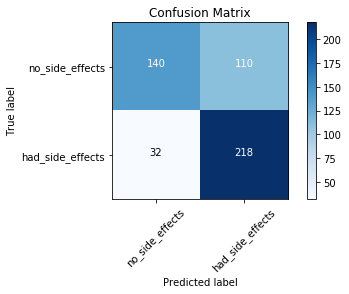

In [24]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

#  Save Model

1.model.save()

In [27]:
model.save('medical.h5')

In [28]:
from keras.models import load_model
new = load_model('medical.h5')

In [29]:
new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [32]:
new.get_weights()

[array([[ 0.58760977, -0.50671446,  0.11928689, -0.32045597,  0.30416322,
         -0.07920212,  0.19481812, -0.269122  ,  0.17695947, -0.57301694,
         -0.3630666 , -0.01659334, -0.5933489 ,  0.36746696,  0.3634463 ,
         -0.23615956]], dtype=float32),
 array([-0.04183329,  0.        , -0.01218727,  0.        ,  0.04922627,
         0.        ,  0.0076362 ,  0.        , -0.01913424,  0.        ,
         0.        ,  0.        ,  0.        ,  0.01480086, -0.00874113,
         0.        ], dtype=float32),
 array([[-3.02667439e-01, -1.91760585e-01, -2.79739380e-01,
          2.17841864e-02,  2.39136681e-01,  1.10749997e-01,
          1.35555208e-01, -6.54384494e-02, -2.50740439e-01,
          2.36394070e-02, -2.99031764e-01,  2.59306073e-01,
          1.42513976e-01,  3.18674296e-01,  2.60694593e-01,
         -3.17164570e-01,  2.76089281e-01, -2.70900458e-01,
          1.27844051e-01, -9.51656476e-02, -7.27828592e-02,
          8.60465690e-02, -2.91051507e-01,  3.84044558e-01,
 

In [33]:
new.optimizer

2. model.to_json()

In [34]:
# To save only architecture 
json_string = model.to_json()

# save as YAML
#yaml_string = model.to_yaml()

In [35]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": 

In [36]:
#model reconstruction from json
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

#model reconstruction from YAML 
#from keras.models import model_from_yaml
#model = model_from_yaml(yaml_string)

In [37]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


3. model.save_weights()

In [38]:
model.save_weights('model_weights.h5')

In [39]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation='softmax')
])

In [40]:
model2.load_weights('model_weights.h5')

In [41]:
model2.get_weights()

[array([[ 0.58760977, -0.50671446,  0.11928689, -0.32045597,  0.30416322,
         -0.07920212,  0.19481812, -0.269122  ,  0.17695947, -0.57301694,
         -0.3630666 , -0.01659334, -0.5933489 ,  0.36746696,  0.3634463 ,
         -0.23615956]], dtype=float32),
 array([-0.04183329,  0.        , -0.01218727,  0.        ,  0.04922627,
         0.        ,  0.0076362 ,  0.        , -0.01913424,  0.        ,
         0.        ,  0.        ,  0.        ,  0.01480086, -0.00874113,
         0.        ], dtype=float32),
 array([[-3.02667439e-01, -1.91760585e-01, -2.79739380e-01,
          2.17841864e-02,  2.39136681e-01,  1.10749997e-01,
          1.35555208e-01, -6.54384494e-02, -2.50740439e-01,
          2.36394070e-02, -2.99031764e-01,  2.59306073e-01,
          1.42513976e-01,  3.18674296e-01,  2.60694593e-01,
         -3.17164570e-01,  2.76089281e-01, -2.70900458e-01,
          1.27844051e-01, -9.51656476e-02, -7.27828592e-02,
          8.60465690e-02, -2.91051507e-01,  3.84044558e-01,
 